In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

In [ ]:
# ================================
# 1. ĐỌC DỮ LIỆU
# ================================
file_path = r'D:\Data_Paper_5G\DATA\TTML.csv'
df = pd.read_csv(file_path)

In [20]:

selected_columns = [
    'DATETIME_ID',
    'TTML',
    'PS_CSSR_NR',
    'SDR_NR',
    'PRB_UTIL_DL_NR',     
    'PRB_UTIL_UL_NR',
    'LATENCY_NR',
    'PKTLOSSR',           
    'CONNECTED_RRC_USER_AVERAGE',
    'CONNECTED_RRC_USER_MAX',
    'DKD5G_NR',
    'EN_DC_SR_NR',
    'HOSR_NR',
    'RASR_NR',
    'DL_TRAFFIC_NR',
    'UL_TRAFFIC_NR',
    'USER_DL_THP_NR',
    'USER_UL_THP_NR',
    'CELL_DL_THP_NR',
    'CELL_UL_THP_NR'
]
df = df[selected_columns]

In [30]:
# Loại bỏ dòng có missing value ở các cột đã chọn
df = df.dropna(subset=selected_columns)
df = df.reset_index(drop=True)

In [31]:
print(f"Đã làm sạch dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột")
print("\n5 dòng đầu:")
print(df.head())

Đã làm sạch dữ liệu: 732 dòng, 20 cột

5 dòng đầu:
   DATETIME_ID        TTML  PS_CSSR_NR  SDR_NR  PRB_UTIL_DL_NR  \
0   2025040100    Mien Bac      100.00    0.00            1.29   
1   2025040100    Mien Nam       79.51    0.01            2.54   
2   2025040100  Mien Trung       29.39    0.01            1.48   
3   2025040100    Mobifone       79.50    0.01            2.50   
4   2025040200    Mien Bac      100.00    0.16            1.04   

   PRB_UTIL_UL_NR  LATENCY_NR  PKTLOSSR  CONNECTED_RRC_USER_AVERAGE  \
0            1.83    29621.44       0.0                     3732.34   
1            1.90    17497.89       0.0                    29287.61   
2            1.87   708317.48       0.0                     6380.65   
3            1.90    84887.49       0.0                    39400.60   
4            1.42    15427.75       0.0                     4384.79   

   CONNECTED_RRC_USER_MAX  DKD5G_NR  EN_DC_SR_NR  HOSR_NR  RASR_NR  \
0                   16119     98.27        99.59    97.

In [21]:
# In ra thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(df.info())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATETIME_ID                 732 non-null    int64  
 1   TTML                        732 non-null    object 
 2   PS_CSSR_NR                  732 non-null    float64
 3   SDR_NR                      732 non-null    float64
 4   PRB_UTIL_DL_NR              732 non-null    float64
 5   PRB_UTIL_UL_NR              732 non-null    float64
 6   LATENCY_NR                  732 non-null    float64
 7   PKTLOSSR                    732 non-null    float64
 8   CONNECTED_RRC_USER_AVERAGE  732 non-null    float64
 9   CONNECTED_RRC_USER_MAX      732 non-null    int64  
 10  DKD5G_NR                    732 non-null    float64
 11  EN_DC_SR_NR                 732 non-null    float64
 12  HOSR_NR                     732 non-null    float64
 13  RASR_NR         

In [24]:
print("\nMô tả thống kê:")
print(df.describe())



Mô tả thống kê:
        DATETIME_ID  PS_CSSR_NR      SDR_NR  PRB_UTIL_DL_NR  PRB_UTIL_UL_NR  \
count  7.320000e+02  732.000000  732.000000      732.000000      732.000000   
mean   2.025067e+09   82.877117    0.525109        2.766544        2.795287   
std    1.705099e+04   12.438624    3.685944        0.664643        0.619416   
min    2.025040e+09    5.730000    0.000000        0.490000        0.610000   
25%    2.025052e+09   77.597500    0.300000        2.327500        2.340000   
50%    2.025070e+09   78.915000    0.330000        2.825000        2.810000   
75%    2.025082e+09  100.000000    0.430000        3.330000        3.260000   
max    2.025093e+09  100.000000  100.000000        3.900000        4.690000   

          LATENCY_NR    PKTLOSSR  CONNECTED_RRC_USER_AVERAGE  \
count     732.000000  732.000000                  732.000000   
mean    11111.550273    0.000505                48240.486885   
std     27872.046455    0.002192                39344.888841   
min         0.0

In [25]:
print("\nCác dòng đầu tiên:")
print(df.head())


Các dòng đầu tiên:
   DATETIME_ID        TTML  PS_CSSR_NR  SDR_NR  PRB_UTIL_DL_NR  \
0   2025040100    Mien Bac      100.00    0.00            1.29   
1   2025040100    Mien Nam       79.51    0.01            2.54   
2   2025040100  Mien Trung       29.39    0.01            1.48   
3   2025040100    Mobifone       79.50    0.01            2.50   
4   2025040200    Mien Bac      100.00    0.16            1.04   

   PRB_UTIL_UL_NR  LATENCY_NR  PKTLOSSR  CONNECTED_RRC_USER_AVERAGE  \
0            1.83    29621.44       0.0                     3732.34   
1            1.90    17497.89       0.0                    29287.61   
2            1.87   708317.48       0.0                     6380.65   
3            1.90    84887.49       0.0                    39400.60   
4            1.42    15427.75       0.0                     4384.79   

   CONNECTED_RRC_USER_MAX  DKD5G_NR  EN_DC_SR_NR  HOSR_NR  RASR_NR  \
0                   16119     98.27        99.59    97.78    98.83   
1               

In [26]:
# Kiểm tra missing values
missing = df.isnull().sum()
print("\nMissing values:")
print(missing[missing > 0])


Missing values:
Series([], dtype: int64)


In [32]:
# ================================
# 2. PHÂN TÍCH & BIỂU ĐỒ BÁO CÁO
# ================================

# Chuyển DATETIME_ID thành datetime (nếu cần)
df['DATETIME_ID'] = pd.to_datetime(df['DATETIME_ID'], format='%Y%m%d%H')

# Thêm cột ngày để vẽ theo thời gian
df['DATE'] = df['DATETIME_ID'].dt.date
df['HOUR'] = df['DATETIME_ID'].dt.hour

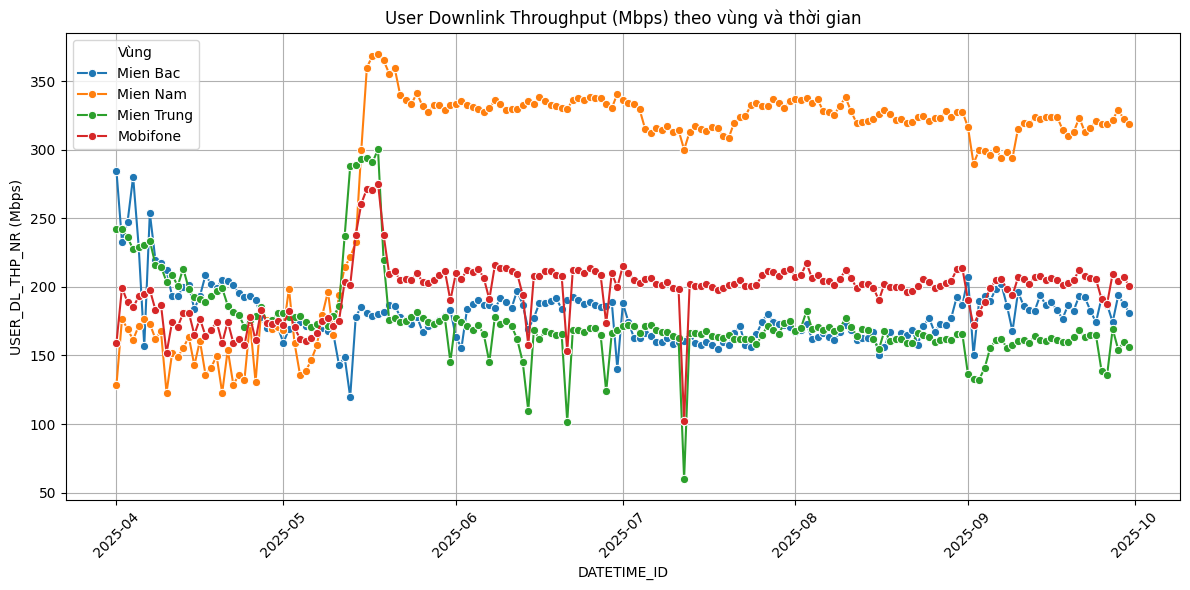

In [33]:
# Biểu đồ 1: USER_DL_THP_NR theo vùng (TTML)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATETIME_ID', y='USER_DL_THP_NR', hue='TTML', marker='o')
plt.title('User Downlink Throughput (Mbps) theo vùng và thời gian')
plt.xticks(rotation=45)
plt.ylabel('USER_DL_THP_NR (Mbps)')
plt.legend(title='Vùng')
plt.grid(True)
plt.tight_layout()
plt.show()

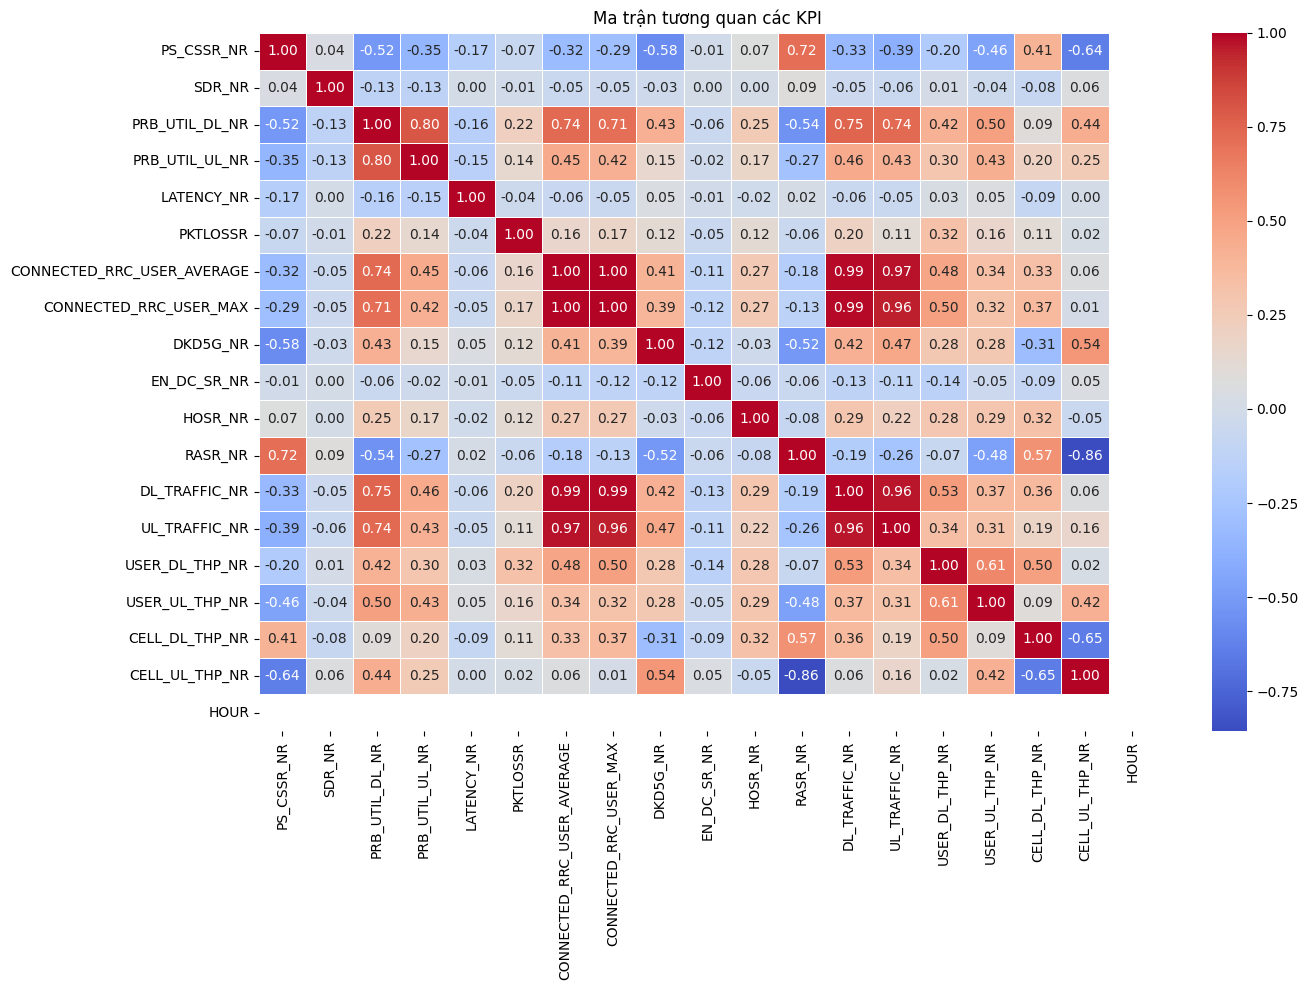

In [36]:
# Biểu đồ 2: Heatmap tương quan (loại bỏ cột không số)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan các KPI')
plt.tight_layout()
plt.show()

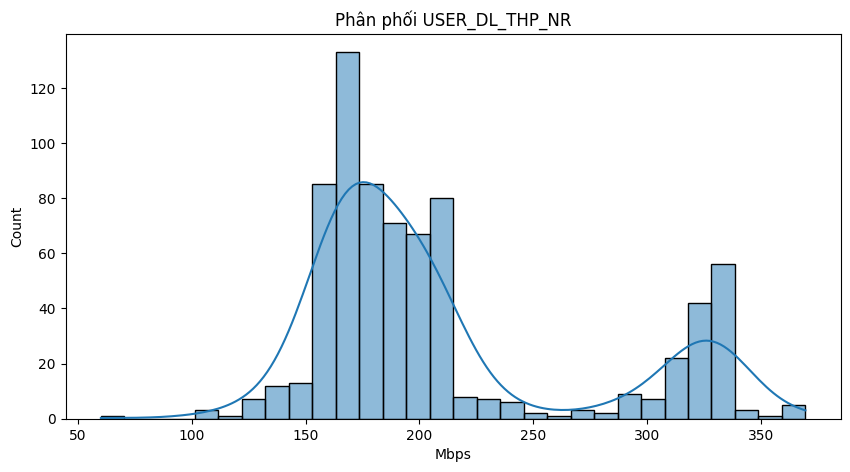

In [37]:
# Biểu đồ 3: Phân phối USER_DL_THP_NR
plt.figure(figsize=(10, 5))
sns.histplot(df['USER_DL_THP_NR'], kde=True, bins=30)
plt.title('Phân phối USER_DL_THP_NR')
plt.xlabel('Mbps')
plt.show()

In [39]:
target = 'USER_DL_THP_NR'

# Features: tất cả cột số, trừ target và DATETIME_ID, TTML (có thể mã hóa sau)
feature_cols = [
    'PS_CSSR_NR', 'SDR_NR', 'PRB_UTIL_DL_NR', 'PRB_UTIL_UL_NR',
    'LATENCY_NR', 'PKTLOSSR', 'CONNECTED_RRC_USER_AVERAGE',
    'CONNECTED_RRC_USER_MAX', 'DKD5G_NR', 'EN_DC_SR_NR',
    'HOSR_NR', 'RASR_NR', 'DL_TRAFFIC_NR', 'UL_TRAFFIC_NR',
    'CELL_DL_THP_NR', 'CELL_UL_THP_NR'
]


# Mã hóa TTML (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['TTML'], prefix='REGION')

# Cập nhật features sau khi mã hóa
feature_cols += [col for col in df_encoded.columns if col.startswith('REGION_')]
X = df_encoded[feature_cols]
y = df_encoded[target]

In [42]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n=== KẾT QUẢ MÔ HÌNH RANDOM FOREST ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


=== KẾT QUẢ MÔ HÌNH RANDOM FOREST ===
Mean Squared Error: 236.6415
R² Score: 0.9232


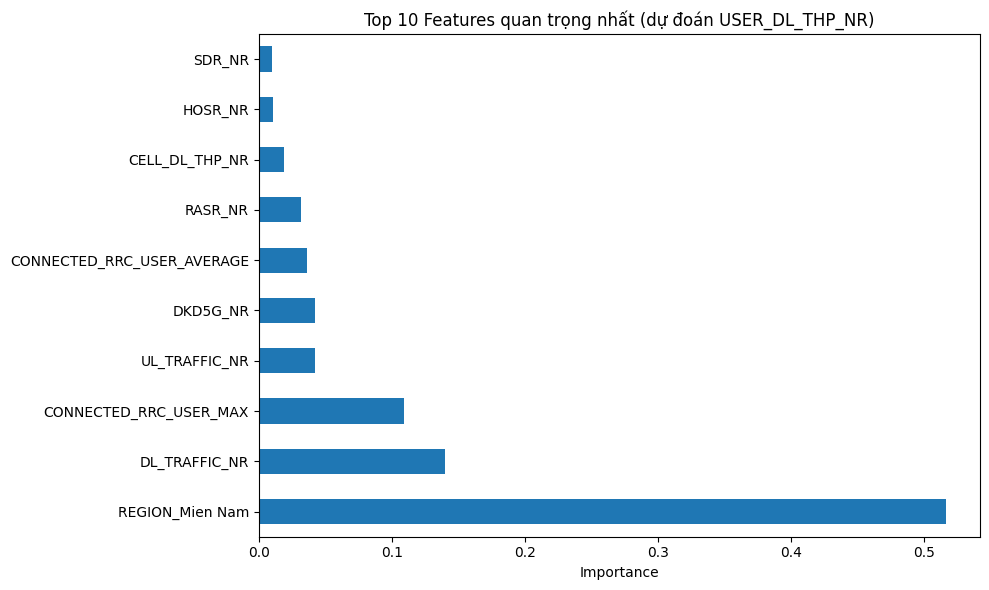

In [47]:
# Tầm quan trọng của features
importances = pd.Series(model.feature_importances_, index=feature_cols)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Features quan trọng nhất (dự đoán USER_DL_THP_NR)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [48]:
# ================================
# 4. DỰ ĐOÁN GIÁ TRỊ MỚI (Ví dụ)
# ================================
# Ví dụ: Dự đoán cho 1 bản ghi mới (Miền Bắc, giờ 2025040300)
new_data = {
    'PS_CSSR_NR': 99.5,
    'SDR_NR': 0.1,
    'PRB_UTIL_DL_NR': 1.5,
    'PRB_UTIL_UL_NR': 1.8,
    'LATENCY_NR': 20000,
    'PKTLOSSR': 0.0,
    'CONNECTED_RRC_USER_AVERAGE': 5000,
    'CONNECTED_RRC_USER_MAX': 20000,
    'DKD5G_NR': 98.5,
    'EN_DC_SR_NR': 99.8,
    'HOSR_NR': 95.0,
    'RASR_NR': 98.0,
    'DL_TRAFFIC_NR': 2.5e7,
    'UL_TRAFFIC_NR': 2.0e6,
    'CELL_DL_THP_NR': 300,
    'CELL_UL_THP_NR': 15,
    'REGION_Mien Bac': 1, 'REGION_Mien Nam': 0, 'REGION_Mien Trung': 0, 'REGION_Mobifone': 0
}

new_df = pd.DataFrame([new_data])
prediction = model.predict(new_df)[0]
print(f"\nDỰ ĐOÁN: USER_DL_THP_NR ≈ {prediction:.2f} Mbps")


DỰ ĐOÁN: USER_DL_THP_NR ≈ 234.30 Mbps
